In [1]:
## web graphics
%matplotlib inline
## interactive graphics
#%matplotlib notebook
%config InlineBackend.figure_format = 'png' 

In [2]:
import numpy as np
import warnings
from scipy.optimize import minimize
from scipy import stats
from importlib import reload
from scipy.stats import poisson, geom, expon


In [3]:
# plotting requirements
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

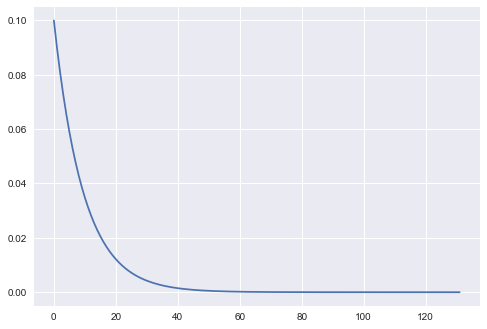

In [4]:
geom_phi = geom(0.1).pmf(np.arange(500))
geom_phi = geom_phi[geom_phi>1e-7].flatten() #careful with this
plt.plot(geom_phi);

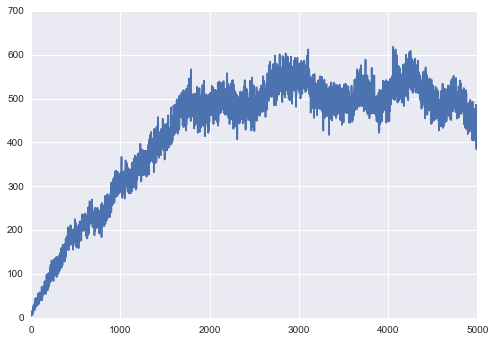

In [8]:
sim_discrete=reload(sim_discrete)
end = 5000
T = sim_discrete.sim_inar(
    immigrants=default_random_state.poisson(5,size=end),
    phi=geom_phi,
    kappa=0.99, #near critical
    end=end);
plt.plot(T);

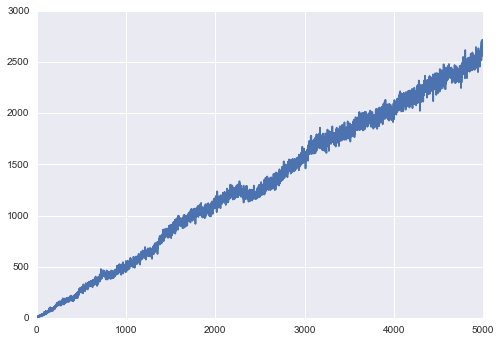

In [10]:
sim_discrete=reload(sim_discrete)
end = 5000
T = sim_discrete.sim_inar(
    mu=5,
    phi=geom_phi,
    kappa=1.0, #critical
    end=end);
plt.plot(T);

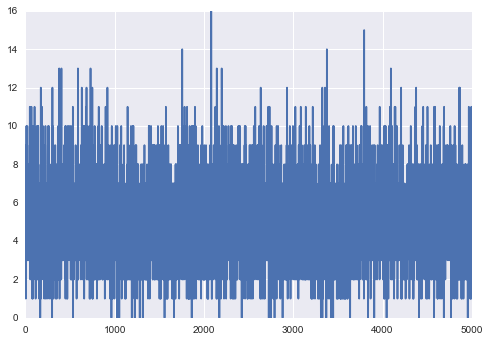

In [15]:
sim_discrete=reload(sim_discrete)
end = 5000
T = sim_discrete.sim_inar(
    mu=5,
    phi=geom_phi,
    kappa=0.00, #boring
    end=end);
plt.plot(T);

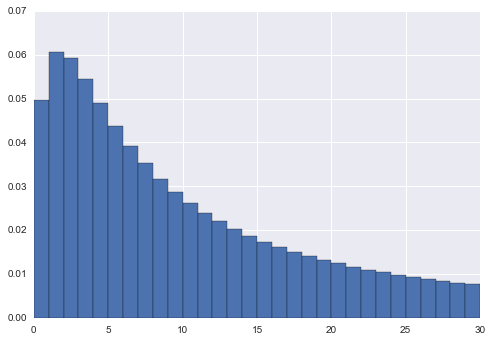

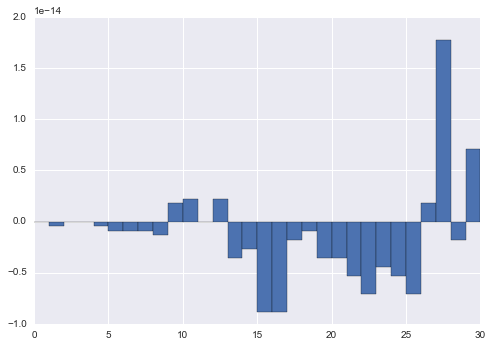

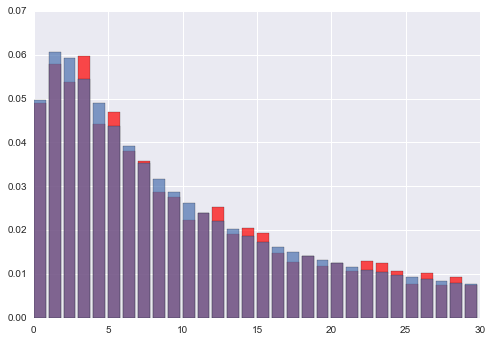

In [16]:
from src import dist
dist = reload(dist)
mu=3
eta=0.9
nsamps=5000
k=np.arange(30)
this_rv = dist.gpd(mu=mu, eta=eta)
plt.bar(k, this_rv.pmf(k), width=1);
#Check log pmf matches:
plt.figure();
plt.bar(k, this_rv.logpmf(k)-np.log(this_rv.pmf(k)), width=1);
#Check simulation approximates the prediction
plt.figure();
sim = this_rv.rvs(nsamps)
sim = sim[sim<=np.max(k)]
plt.bar(k, np.bincount(sim)/nsamps, alpha=0.7, color="red");
plt.bar(k, this_rv.pmf(k), alpha=0.7);


slow branching 0.494 fast branching 0.48 total branching 0.95
average rate 98.1252631579


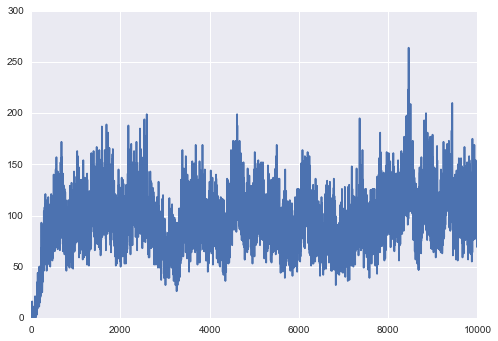

In [80]:
sim_discrete=reload(sim_discrete)
dist = reload(dist)
int_eta = 0.48
eta = 0.494
end = 10000
C = sim_discrete.sim_inar(
    mu=5*(1-int_eta),
    phi=geom_phi,
    eta=eta,
    conditional_rvs=lambda rate: dist.gpd.rvs(rate, eta=int_eta, random=random),
    end=end);
plt.plot(C);
print("slow branching", eta, "fast branching", int_eta, "total branching", eta/(1.0-int_eta))
print("average rate", C[500:].mean())


slow branching 0.095 fast branching 0.9 total branching 0.9500000000000002
average rate 93.0317894737


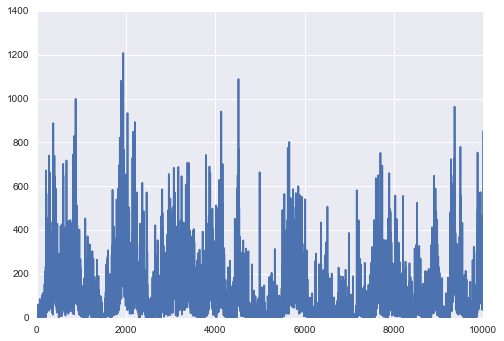

In [81]:
sim_discrete=reload(sim_discrete)
dist = reload(dist)
int_eta = 0.9
eta = 0.095
end = 10000
C = sim_discrete.sim_inar(
    mu=5*(1-int_eta),
    phi=geom_phi,
    eta=eta,
    conditional_rvs=lambda rate: dist.gpd.rvs(rate, eta=int_eta, random=random),
    end=end);
plt.plot(C);
print("slow branching", eta, "fast branching", int_eta, "total branching", eta/(1.0-int_eta))
print("average rate", C[500:].mean())


slow branching 0.9 fast branching 0.0526317 total branching 0.9500001213889043
average rate 100.304526316


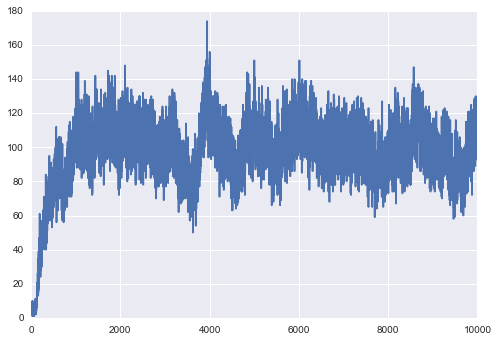

In [82]:
sim_discrete=reload(sim_discrete)
dist = reload(dist)
int_eta = 0.0526317
eta = 0.9
end = 10000
C = sim_discrete.sim_inar(
    mu=5*(1-int_eta),
    phi=geom_phi,
    eta=eta,
    conditional_rvs=lambda rate: dist.gpd.rvs(rate, eta=int_eta, random=random),
    end=end);
plt.plot(C);
print("slow branching", eta, "fast branching", int_eta, "total branching", eta/(1.0-int_eta))
print("average rate", C[500:].mean())
